# Practice: Statistical analysis of the Lipinski's rule of five

## Theory

### **Pharmacokinetics**

Pharmacokinetics are the study of what happens to a compound in an organism over a period of time ([Grogan S, Preuss CV. Pharmacokinetics, 2022](https://www.ncbi.nlm.nih.gov/books/NBK557744/)). It is divide into four steps: **A**bsorption, **D**istribution, **M**etabolism and **E**xcretion ([ADME](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4110820/)). Some times also is includes **T**oxicology (ADMET) and **L**iberation (LADME).

 
![ADME](Data/ADME.jpg)

*Figure 1*. Steps that make up the pharmacokinetics. From: [Somvanshi, Kharat, Jadhav, Thorat & Townley, 2021](https://doi.org/10.1016/B978-0-323-85050-6.00007-4)

   * **Absorption:** It refers to the amount and time it takes for a compound or substance to enter to the systemic circulationt from the site of administration. This depends on multiple factors such as the ability of the compound to penetrate the intestinal wall, the solubility of the compound, the gastric emptying time, the chemical stability of the compound in the stomach, among others.
   * **Distribution:** It refers to how a substance is spread throughout the body. This depends on the diffusion and convection which may be influenced by the polarity, size, or binding abilities of the drug, the fluid status of the patient, or the body habitus of the individual. It is very important to achieve the effective drug concentration in the receptor site because to be effective a medication must reach its designated compartmental destination.
   * **Metabolism:** It refers to the processing of the drug by the body into subsequent compounds. It can be also to convert a drug  into more water-soluble substances in order to be more easily to excreted or in the case of prodrugs the metabolism is required to convert the drug into active metabolites.
   * **Excretion:** It refers to the process by which the drug is eliminated from the body. Generally the kidneys are the conduct of excretion by a passive filtration in the glomerulus or secretion in the tubules.

### **Lipinski's rule of five:**

The Lipinski's rule of five is one way to screen out compounds with probable absorption problems. This rule states that poor absorption or permeation of a drug is more probable when the chemical structure fulfils two or more of the [following criteria:](https://www.sciencedirect.com/science/article/pii/B008045044X001474)
1. Molecular weight (MW) is greater than 500.
2. The calculated log P value is above 5.
3. There are more than 5 hydrogen bond donors (–NH–, –OH).
4. The number of hydrogen bond acceptors (–N ¼ , –O–) is greater than 10.

It is importat to know that the rule of five e does not definitively categorize all well and poorly absorbed compounds, although it is simple, fast, and provides a reasonable degree of classification.

## Problem Statement

For an investigation of a new drug we want to know if it is really absorbed by the body, if it is able to cross certain barriers to reach his target, how is it metabolized and how is excreted from the body. In this way doctors will have greater flexibility in prescribing and administering medications thus providing greater benefit with less risk and making adjustments as necessary, given the varied physiology and lifestyles of patients.

In order to know the absorption of the compounds we will use bioinformatic tools to be able to calculate Lipinski's rule of five and then we will calculate some statistics to plot them and analyze.

## Import the necessary libraries

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi
import os
from pathlib import Path

## Load dataset of P49841
The dataset contain the bioactive compounds against Glycogen synthase kinase-3 beta that we built in the tutorial 2.1_Dataframes.
The first thing we are going to do is import the database, we have to create a `root directory` (`ROOT_DIR`) to be able to navigate to the file.


In [8]:
current_directory = os.getcwd()
ROOT_DIR = Path(current_directory).parent
uniprot_id = 'P49841'
print('Directorio raíz:', ROOT_DIR)
df_output = pd.read_csv(f'{ROOT_DIR}/2_PART_TWO/data/compounds_P49841_full.csv')
df_output.head()

Directorio raíz: C:\Users\caramirezs\My Drive\Python\DS-for-DD


,molecule_chembl_id,pIC50,smiles,ROMol
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i..."


## Lipinski's rule of five

The function below will allow us to calculate the chemical properties of Lipinski's rule of five having as input the SMILES. Then the conditions of the rule of five will be defined and finally we will have information whetherrule of five is violated.

In [9]:
def Ro5(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated 
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])

Now we are going to apply Lipinski's rule of 5 to our data set

In [10]:
df_rule5 = df_output.apply(Ro5, axis=1)
# Nombre de las columnas condition columns
df_rule5.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']
df_rule5.head()
# rule5_df = comp_def.apply(df_rule_5, axis=1)
# print('# of compounds in unfiltered data set:', len(comp_def))

,MW,HBA,HBD,LogP,rule_of_five_conform
0,514.165248,6,1,3.3616,yes
1,407.186987,7,3,2.4397,yes
2,392.196074,8,0,1.9610,yes
3,484.211055,7,1,3.2107,yes
4,393.171336,7,3,1.9218,yes


In [11]:
df_molecule = df_output.join(df_rule5)
df_molecule.head()

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes


# of compounds in filtered data set: 2429
# of compounds not compliant with Lipinski's rule of five: 176
yes    2429
no      176
Name: rule_of_five_conform, dtype: int64


<AxesSubplot: >

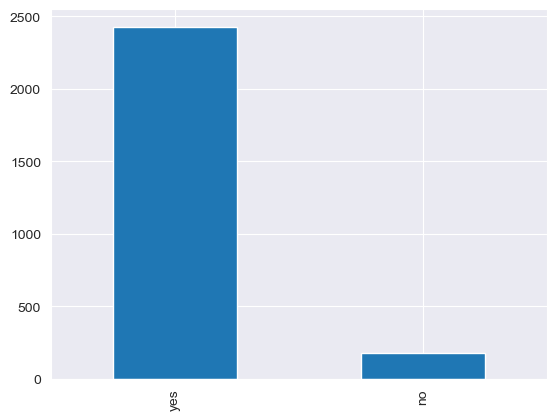

In [13]:
# Delete empty rows --> rule of five
fil_df = df_molecule[df_molecule['rule_of_five_conform']=='yes']
print('# of compounds in filtered data set:', len(fil_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(df_molecule)-len(fil_df)))
print(df_molecule.rule_of_five_conform.value_counts())
df_molecule.rule_of_five_conform.value_counts().plot.bar()

Now we will save the dataset that has not been filtered

In [29]:
df_molecule.to_csv('data/compounds_P49841_lipinski.csv', index=False)

## Plot the properties of the rule of five per molecule as bar plots.

In [30]:
# Import the dataset
lipinski_comp = pd.read_csv('data/compounds_P49841_lipinski.csv')
lipinski_comp.head(10)

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
5,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
6,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
7,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
8,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
9,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes


Since we have many molecules we will do it only for the first 5 of the DataFrame

In [31]:
comp_5_lipinski = lipinski_comp.iloc[:5]
comp_5_lipinski

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes


#### Now we will make the bar plot.

In [17]:
ro5_properties = {
    "MW": (500, "molecular weight (Da)"),
    "HBA": (10, "# HBA"),
    "HBD": (5, "# HBD"),
    "LogP": (5, "logP"),
}

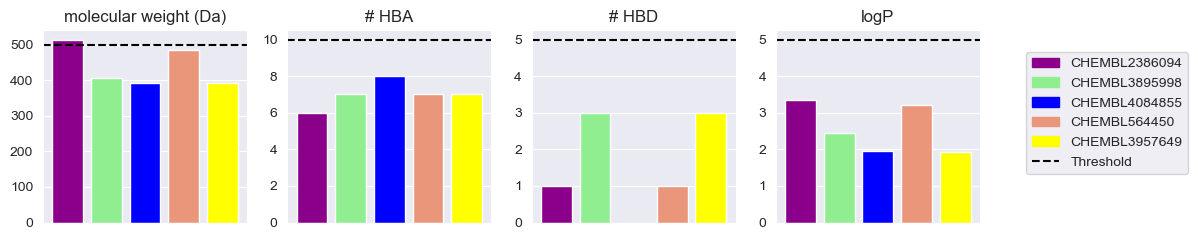

In [32]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(comp_5_lipinski) + 1)
colors = ["DarkMagenta", "LightGreen", "blue", "DarkSalmon", "yellow"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([0, 1, 2, 3, 4], comp_5_lipinski [key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [mpatches.Patch(color=colors[index], label=row["molecule_chembl_id"]) for index, row in comp_5_lipinski.iterrows()]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

## Plot the properties of the rule of five per molecule as scatter plots.

<Figure size 2000x2000 with 0 Axes>

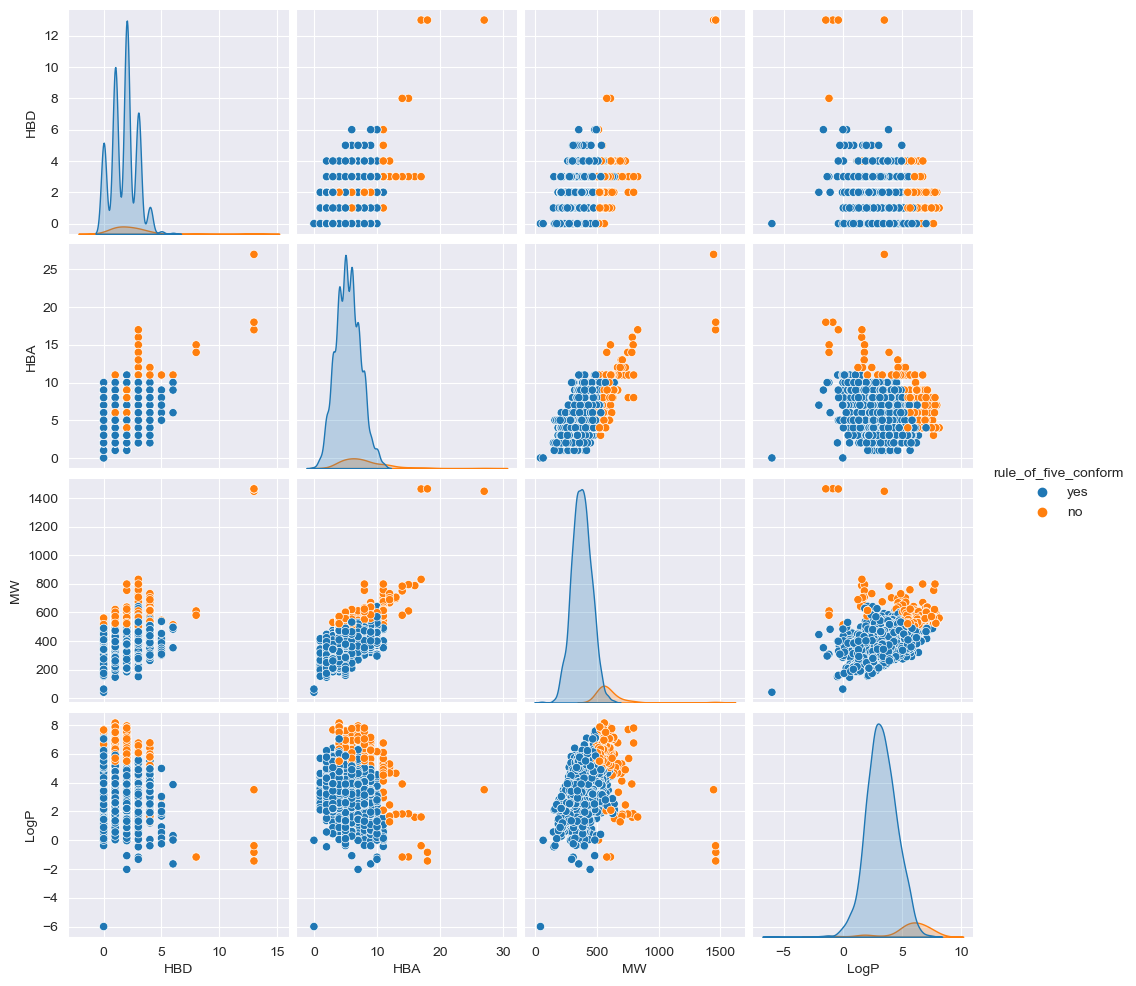

In [51]:
fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=lipinski_comp, vars=['HBD', 'HBA', 'MW', 'LogP'], hue='rule_of_five_conform')
plt.show()
plt.close()

## Plot the properties of the rule of five per molecule as radar plot.

In [36]:
# Import the dataset
lipinski_comp = pd.read_csv('data/compounds_P49841_lipinski.csv')
lipinski_comp.head(10)

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
5,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
6,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
7,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
8,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
9,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes


Due to the chemical properties of the rule of five are in different scale we need to transform them so that they are on the same scale in order to plot them in the radar plot. So we will scale all property values to a scaled between 0 and 10.
Initially, the entire dataset is scaled (scaled values are added in the last columns):

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_scaled = scaler.transform(df_molecule[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_scaled = df_molecule.join(pd.DataFrame(df_molecule_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))

In [40]:
df_molecule_scaled.head()

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes,3.318721,2.222222,0.769231,6.619393
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes,2.566824,2.592593,2.307692,5.966979
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes,2.461461,2.962963,0.000000,5.628211
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes,3.108188,2.592593,0.769231,6.512604
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes,2.468315,2.592593,2.307692,5.600470


For the radar plot we need the mean and standard deviations of a dataset, so we will create a function that allows us to calculate these two statistics for the scaled values.

For the radar plot we need the mean and standard deviations of a dataset:

In [41]:
metrics_Ro5_stats_scaled = df_molecule_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_Ro5_stats_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,2.443684,2.056871,1.371623,6.658927
std,0.722296,0.791545,0.923901,1.032100


Now let's create the function that performs the graph. Two lists should be given as input: one list with the mean of each property and another with the standard deviation.

In [42]:
def plot_radar(stats_mean, stats_std):
    from math import pi
    import numpy as np
    # ------- PART 1: Create background
    # number of variable
    N = 4

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    # ax.set_theta_offset(pi / 2)
    # ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    categories = ['MW (scaled)', 'HBA (scaled)', 'HBD (scaled)', 'LogP (scaled)']
    plt.xticks(angles[:-1], categories, size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8], ["2", "4", "6", "8"],
               color="grey", size=12)
    # plt.ylim(0,10)

    # ------- PART 2: Add plots
    # Plot each individual = each line of the data
    # data
    data = stats_mean.values
    data = np.append(data, data[0])  # close polygon
    ax.plot(angles, data, linewidth=3, linestyle='solid', color='purple', label="mean")
    # data + std
    data_std_up = stats_mean.values + stats_std.values
    data_std_up = np.append(data_std_up, data_std_up[0])  # close polygon
    ax.plot(angles, data_std_up, linewidth=2, linestyle='dashed', color='limegreen', label="mean + std")
    # data - std
    data_std_down = stats_mean.values - stats_std.values
    data_std_down = np.append(data_std_down, data_std_down[0])  # close polygon
    ax.plot(angles, data_std_down, linewidth=2, linestyle='dashed', color='limegreen', label="mean - std")

    # rule of five area
    ro5_properties = {"MW": 500, "HBA": 10, "HBD": 5, "LogP": 5}
    ro5_properties_scaled = scaler.transform(pd.DataFrame([ro5_properties]))[0]
    ro5_properties_scaled = np.append(ro5_properties_scaled, ro5_properties_scaled[0])

    ax.fill(angles, ro5_properties_scaled, 'thistle', alpha=0.6, label="rule of five area")

    # Add legend
    plt.legend(loc='upper right')
    plt.ylim(0,max(max(data_std_up), max(ro5_properties_scaled)))

    # Show the graph
    plt.show()

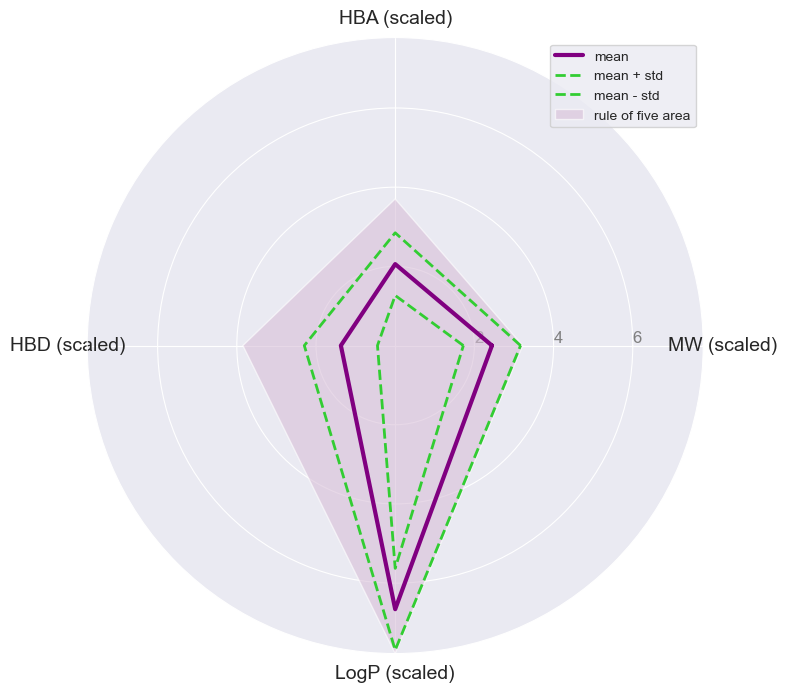

In [43]:
# We plot the radarplot for the dataset of compounds (ALL).
plot_radar(metrics_Ro5_stats_scaled.loc['mean'], metrics_Ro5_stats_scaled.loc['std'])

### Radar plot - Rof comfort: YES
Now we are going to repeat the process, but only with the molecules that passed the rule of five test.
We must first filter the set `rule_of_five_conform: yes`

In [44]:
df_molecule_Ro5_yes = df_molecule[df_molecule['rule_of_five_conform']=='yes']

And then we repeat the above process but with the filtered data:

In [45]:
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_yes_scaled = scaler.transform(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_yes_scaled = df_molecule.join(pd.DataFrame(df_molecule_Ro5_yes_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))
df_molecule_Ro5_yes_scaled.head()

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes,7.866988,5.454545,1.666667,6.890719
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes,6.084625,6.363636,5.000000,6.211563
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes,5.834862,7.272727,0.000000,5.858909
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes,7.367922,6.363636,1.666667,6.779552
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes,5.851111,6.363636,5.000000,5.830030


In [46]:
metrics_df_molecule_Ro5_yes_scaled = df_molecule_Ro5_yes_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_df_molecule_Ro5_yes_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,5.535159,4.900633,2.900371,6.815919
std,1.313009,1.738582,1.838070,0.946799


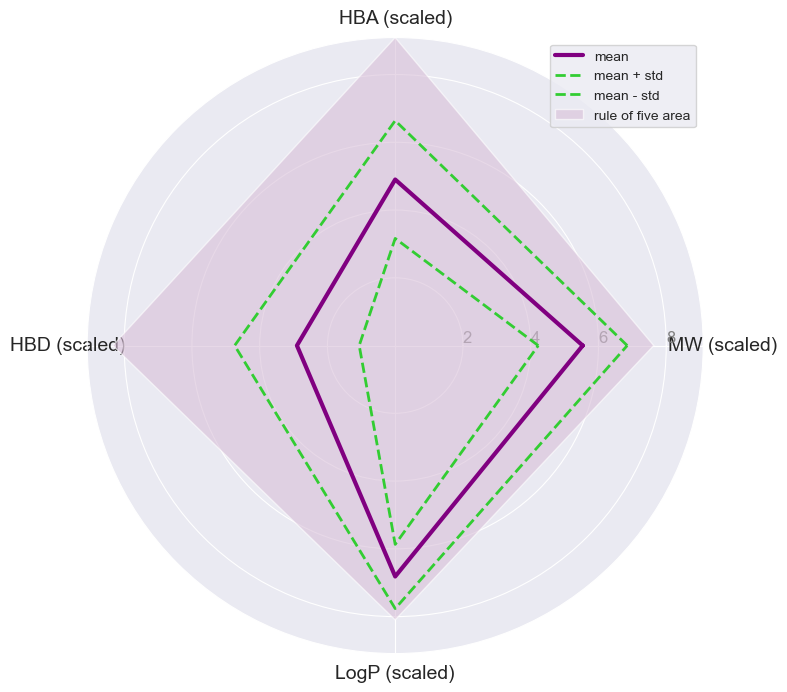

In [47]:
plot_radar(metrics_df_molecule_Ro5_yes_scaled.loc['mean'], metrics_df_molecule_Ro5_yes_scaled.loc['std'])

## Radar plot - Rof comfort: NO
Now we are going to repeat the process, but only with the molecules that passed the rule of five test.
We must first filter the set `rule_of_five_conform: no`


In [48]:
df_molecule_Ro5_no = df_molecule[df_molecule['rule_of_five_conform']=='no']
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(df_molecule_Ro5_yes[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_no_scaled = scaler.transform(df_molecule_Ro5_no[['MW', 'HBA', 'HBD', 'LogP']])
df_molecule_Ro5_no_scaled = df_molecule.join(pd.DataFrame(df_molecule_Ro5_no_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))
df_molecule_Ro5_no_scaled.head()

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes,8.833155,5.454545,6.666667,9.128435
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",407.186987,7,3,2.4397,yes,8.351792,5.454545,1.666667,8.534794
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes,8.381645,10.000000,8.333333,6.588882
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes,8.118277,5.454545,1.666667,8.247411
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes,8.849093,10.000000,3.333333,8.246526


In [49]:
metrics_df_molecule_Ro5_no_scaled = df_molecule_Ro5_no_scaled[['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']].agg(["mean", "std"])
metrics_df_molecule_Ro5_yes_scaled

,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
mean,5.535159,4.900633,2.900371,6.815919
std,1.313009,1.738582,1.838070,0.946799


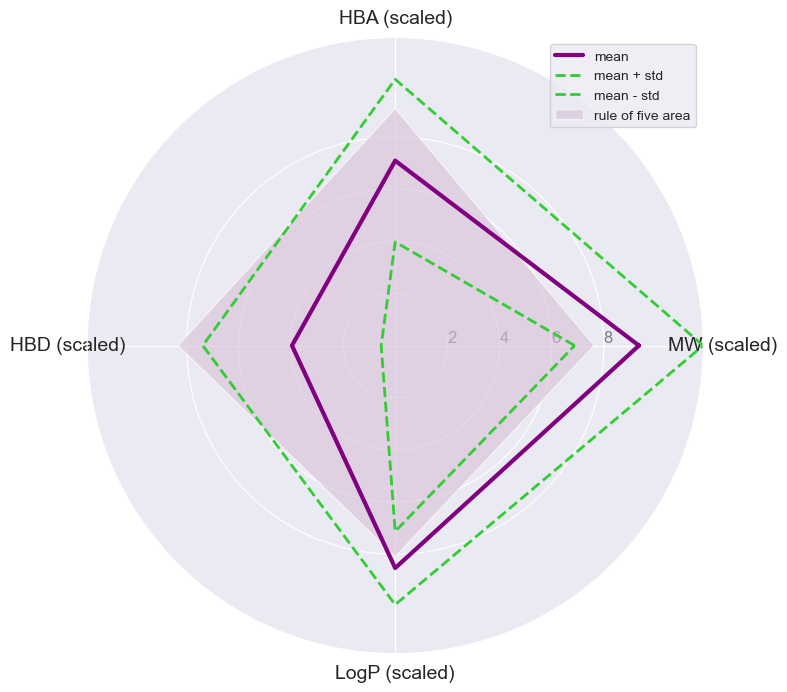

In [50]:
# We plot the radarplot for the dataset of compounds that violate the Ro5
plot_radar(metrics_df_molecule_Ro5_no_scaled.loc['mean'], metrics_df_molecule_Ro5_no_scaled.loc['std'])

## Practical activity

Taking into account what you have learned in this Notebook, answer:
1. How can you make a bar plot for the complete dataset?
2. How can you make a scatter plot for the dataset that fulfill the rule of five?

## Conclusion

In this practice, we have learned about Lipinski's rule of five as a measure to estimate a compound's oral bioavailability and we have applied the rule on a dataset. Also, we learn different plots that allow as to visualize how the dataset is regarding with the rule of five.